In [37]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import torch
import torch.nn as nn
from torchvision import transforms, datasets
from torch.utils.data import DataLoader, Dataset
from sklearn.metrics import confusion_matrix


In [3]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df['Outcome'].unique()

array([1, 0], dtype=int64)

In [7]:
class Diabetes(Dataset):
    def __init__(self, target_col_name="Outcome"):
        self.df = pd.read_csv("diabetes.csv")
        x = self.df.drop(target_col_name, axis=1).to_numpy()
        self.x = torch.from_numpy(x)
        
        # replacement_dict = {'Setosa': 0, 'Versicolor': 1, 'Virginica': 2}
        y = self.df[target_col_name].to_numpy()
        self.y = torch.from_numpy(y)

    def __getitem__(self, index):
        return self.x[index], self.y[index]

    def __len__(self):
        return self.df.shape[0]

In [8]:
df.shape

(768, 9)

In [10]:
diabetes_data = Diabetes()
len(diabetes_data)

768

In [14]:
diabetes_data_loader = DataLoader(diabetes_data, batch_size=128, shuffle= True)

In [15]:
for data in diabetes_data_loader:
    x, y = data
    print(f"independent col data: {x}, \ntaget_col: {y}")
    break

independent col data: tensor([[8.0000e+00, 1.0900e+02, 7.6000e+01,  ..., 2.7900e+01, 6.4000e-01,
         3.1000e+01],
        [2.0000e+00, 1.1900e+02, 0.0000e+00,  ..., 1.9600e+01, 8.3200e-01,
         7.2000e+01],
        [8.0000e+00, 1.2400e+02, 7.6000e+01,  ..., 2.8700e+01, 6.8700e-01,
         5.2000e+01],
        ...,
        [0.0000e+00, 1.1700e+02, 0.0000e+00,  ..., 3.3800e+01, 9.3200e-01,
         4.4000e+01],
        [2.0000e+00, 1.9700e+02, 7.0000e+01,  ..., 3.4700e+01, 5.7500e-01,
         6.2000e+01],
        [6.0000e+00, 8.7000e+01, 8.0000e+01,  ..., 2.3200e+01, 8.4000e-02,
         3.2000e+01]], dtype=torch.float64), 
taget_col: tensor([1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
        0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
        0, 1, 0, 0, 1, 0, 1,

In [24]:
from sklearn.model_selection import train_test_split

X_train,X_test= train_test_split(diabetes_data, test_size=0.2,random_state=0)

In [25]:
BATCH= 128
train_data_loader= DataLoader(dataset= X_train, 
                              batch_size= BATCH,
                              shuffle= True)

test_data_loader= DataLoader(dataset= X_test, 
                              batch_size= BATCH,
                              shuffle= True)

In [33]:
for data in test_data_loader:
    x[0], x[1]  = data
    print(f"independent col data: {x[0]}, \ntaget_col: {x[1]}")
    break

independent col data: tensor([[  0.0000, 152.0000,  82.0000,  ...,  41.5000,   0.2700,  27.0000],
        [  0.0000,  94.0000,  70.0000,  ...,  43.5000,   0.3470,  21.0000],
        [  9.0000, 102.0000,  76.0000,  ...,  32.9000,   0.6650,  46.0000],
        ...,
        [  4.0000,  92.0000,  80.0000,  ...,  42.2000,   0.2370,  29.0000],
        [  1.0000,  97.0000,  64.0000,  ...,  18.2000,   0.2990,  21.0000],
        [  7.0000,  97.0000,  76.0000,  ...,  40.9000,   0.8710,  32.0000]],
       dtype=torch.float64), 
taget_col: tensor([0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
        0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
        0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 1, 0, 0, 1])


In [34]:
for x in train_data_loader:
    print(x[0].shape)
    print(x[1].shape)
    break

torch.Size([128, 8])
torch.Size([128])


In [35]:
DEVICE= "cuda" if torch.cuda.is_available() else 'cpu'
DEVICE

'cuda'

In [38]:
# Lets define the model

class NeuralNetwork(nn.Module):
    def __init__(self, in_, out_):
        super(NeuralNetwork, self).__init__()
        self.layers= nn.Sequential(
            nn.Linear(in_, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, out_)
            )
    def forward(self, x):
        return self.layers(x)

In [39]:
model = NeuralNetwork(8, 2)
model.to(DEVICE)
model

NeuralNetwork(
  (layers): Sequential(
    (0): Linear(in_features=8, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=2, bias=True)
  )
)

In [40]:
model.parameters()

<generator object Module.parameters at 0x0000022FFF8E4B30>

In [41]:
CE_loss= nn.CrossEntropyLoss()
optimizer= torch.optim.Adam(model.parameters())

In [48]:
x.dtype

torch.float64

In [49]:
## Training loop
EPOCHS = 500
loss_ = list()
acc_ = list()


for epoch in range(EPOCHS):
    print(f"Epoch: {epoch + 1}/{EPOCHS}")
    for batch, data in enumerate(train_data_loader):
        x = data[0].to(DEVICE)
        y = data[1].to(DEVICE)
        
        optimizer.zero_grad()
        
        y_pred = model(x.reshape(-1, 8).float())
        
        loss = CE_loss(y_pred, y)
        
        loss_.append(loss.item())
        loss.backward()
        optimizer.step()
        
        accuracy = torch.mean((torch.argmax(y_pred, 1) == y).float()).item()
        acc_.append(accuracy)
        
        if batch%100 == 0:
            print(f"   Batch: {batch}, Loss: {loss.item():.4f} Accuracy {accuracy:.4f}")

Epoch: 1/500
   Batch: 0, Loss: 1.5099 Accuracy 0.3828
Epoch: 2/500
   Batch: 0, Loss: 3.3006 Accuracy 0.3672
Epoch: 3/500
   Batch: 0, Loss: 1.9457 Accuracy 0.6328
Epoch: 4/500
   Batch: 0, Loss: 1.0273 Accuracy 0.6328
Epoch: 5/500
   Batch: 0, Loss: 0.8636 Accuracy 0.5938
Epoch: 6/500
   Batch: 0, Loss: 1.1769 Accuracy 0.5859
Epoch: 7/500
   Batch: 0, Loss: 0.7021 Accuracy 0.6406
Epoch: 8/500
   Batch: 0, Loss: 0.5976 Accuracy 0.6953
Epoch: 9/500
   Batch: 0, Loss: 0.5962 Accuracy 0.7031
Epoch: 10/500
   Batch: 0, Loss: 0.5428 Accuracy 0.6953
Epoch: 11/500
   Batch: 0, Loss: 0.6246 Accuracy 0.6953
Epoch: 12/500
   Batch: 0, Loss: 0.5389 Accuracy 0.7188
Epoch: 13/500
   Batch: 0, Loss: 0.5582 Accuracy 0.7031
Epoch: 14/500
   Batch: 0, Loss: 0.5684 Accuracy 0.6953
Epoch: 15/500
   Batch: 0, Loss: 0.4838 Accuracy 0.7656
Epoch: 16/500
   Batch: 0, Loss: 0.5279 Accuracy 0.7188
Epoch: 17/500
   Batch: 0, Loss: 0.6372 Accuracy 0.6172
Epoch: 18/500
   Batch: 0, Loss: 0.6134 Accuracy 0.6328
E

<Axes: >

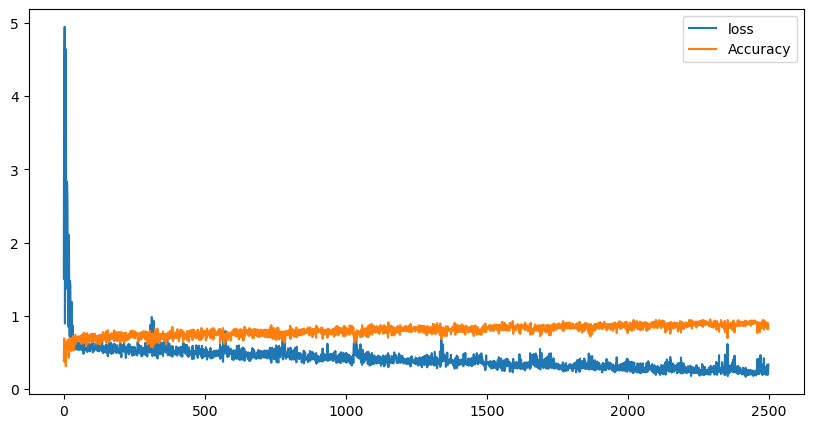

In [50]:
# plot the Train acc and loss
# plt.figure(figsize=(14,14))
pd.DataFrame(data={'loss': loss_, "Accuracy": acc_}).plot(figsize=(10,5))

In [53]:
# testing over the test data
test_loss = 0
test_acc = 0
with torch.no_grad():
    for batch, data in enumerate(test_data_loader):
        x = data[0].to(DEVICE)
        y = data[1].to(DEVICE)

        y_pred= model(x.reshape(-1, 8).float())
        loss = CE_loss(y_pred, y)

        test_loss += loss.item()
        test_acc += torch.mean((torch.argmax(y_pred, 1) == y).float()).item()
        batch+=1

In [54]:
print(f"test loss: {test_loss/batch:.4f}, test accuracy: {test_acc/batch:.4f}")

test loss: 0.8851, test accuracy: 0.7169


In [55]:
pred = np.array([])
target = np.array([])

with torch.no_grad():
    for batch, data in enumerate(test_data_loader):
        x = data[0].to(DEVICE)
        y = data[1].to(DEVICE)        
        
        y_pred = model(x.reshape(-1, 8).float())
        loss = CE_loss(y_pred, y)
        
        pred = np.concatenate((pred, torch.argmax(y_pred, 1).cpu().numpy()))
        target = np.concatenate((target, y.cpu().numpy()))  

In [56]:
cm = confusion_matrix(target, pred)
cm

array([[78, 29],
       [16, 31]], dtype=int64)

<Axes: >

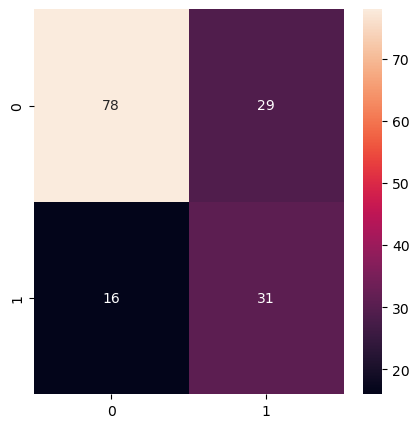

In [58]:
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d')